# Sixes

<div>
<img src="images/probability/sixes_and_fives.jpg" width="600" align="left"/>
</div>
<BR><BR><BR><BR><BR><BR>
<BR><BR><BR><BR><BR><BR>
<BR><BR><BR><BR><BR><BR>

A pair of sixes and a pair of fives. 


# This Notebook


This notebook concerns probability and expectation. It centers on a game
I call 'Sixes' which is played using some number of dice, say $n$ dice. 
The game is one of pure chance, not skill: The player throws all of the 
$n$ dice repeatedly hoping to roll sixes. Once a die in the group comes
up six it is considered out of the game: It can be removed or painted blue
or whatever we like. The player's score is the number of throws necessary
for all of the dice to have come up six at least once. The game itself 
is not particularly interesting; but the question of what is the expected
score as a function of the number of dice $n$ ***is***.
    
    
## A Warm-up problem
    
    
Kid Pipkin is considering colleges and notices that each has an "acceptance rate". For example Cornell seems to accept 11% of the students who apply. 
She wonders, 'If I apply to all the colleges I am interested in, what is the probability I will get into at least one of them?'
    

Incidental note: College admission is not a *completely* random process. It would be a mistake to assume that all applicants
have the same probability of admission.
    
    
A simpler problem: What is the probability of getting
accepted to at least one of $n$ colleges if each has an acceptance rate of 10%? 
Obviously with $n=1$ the answer is 10%. If $n=2$
the answer is 19%.

In [46]:
import numpy as np 
from math import comb

#    MIT, Brown,JHU,BU,Boston C,NEastern,Cornell,Stanford,Caltech,UCB,UCLA,UCSD,CMU, CP-SLO]
b = [.073,.077,.111,.14,0.264,  0.205,   .107,   .052,    .067,   .16,.185,.366,.173,.309] 
a = len(b)
trials = 1000000

# calculate the probability through random trials
from random import random
d = 0
for t in range(trials):
    for c in range(a):
        if random() <= b[c]:
            d += 1
            break

# calculate the probability through mathematical solution
not_product = 1.
for i in range(a): not_product *= (1.-b[i])
calc_accept = 1.-not_product

print()
print(a, 'college apps')
print('The percent probability of acceptance to one or more: ', round(100*d/trials, 3))
print('This was calculated using many trials.')
print('The "not product" exact solution gives', round(100*calc_accept, 3))
print('Notice they are comparable.')
print()


14 college apps
The percent probability of acceptance to one or more:  92.541
This was calculated using many trials.
The "not product" exact solution gives 92.501
Notice they are comparable.



## Sixes game: With a single die


A probability is a number between zero to one inclusive. 
As happens above, we can run experiments many times to
empirically calculate probabilities. That is: Averaging
the results from many experiments gives an approximation
of the answer to the question: Given $n$ dice to start
with, how many rolls or throws of the dice will it take
until each die has come up six at least once? 


These experiments 
are called *trials*.


Averaging over trials gives an **expectation**: How will
a given experiment turn out on average? 


### expectation: by method 1

 
How many times must I throw a six-sided die on average 
before it comes up six?


I start throwing this die until it comes up six. When it does: That is
the end of the trial and I write down the number of throws needed. 
I repeat this many times and average the numbers. 


Here is some empirical experiment code to do this.

In [45]:
from random import randint

nTrials, sum_of_throws = 1000000, 0
for trial in range(nTrials):
    throws = 1
    while not randint(1, 6) == 6: throws += 1
    sum_of_throws += throws
print(sum_of_throws / nTrials)

5.990648


After one million trials the expectation comes in around six. That seems fair
since I would get the same answer regardless of which possible number I 
consider as the target outcome. 

    

### expectation by method 2


Draw a stack of 50 empty boxes labeled 1, 2, 3, ... 50.
Do the same trials but rather than write down a score for each 
game: Put a tick mark in the corresponding box. 
Calculate the expectation by summing the product of each box
number with its tick mark count. Divide this sum by the number 
of trials.


This is arithmetically the same as method 1. The difference is the visual 
image of boxes containing tick marks: The boxes closer to zero will have more
tick marks. Tick marks in boxes further away from zero represent dice 
that were 'unlucky' in not coming up six sooner.


### expectation by method 3


As in method 2 accumulate tick marks in boxes. However rather than 
dividing by the number of trials in the final step to get expectation, 
modify the calculation for each box: Make this the number of tick marks 
in the box multiplied by the box number divided by the number of 
trials. The ratio of tick marks to trials for a particular box is an 
experimental measurement of probability.


Method 3 is not efficient computationally; but it is important 
conceptually because it connects the idea of a probability for
an outcome to the notion of all possible outcomes and their
probabilities; and finally to a calculation of expectation.
Knowing probabilities allows us to calculate
an expectation directly rather than resorting to experiments.


Probabilities arrived at in method 3 above act as weights
in a weighted average. Considering all possible outcomes, 
the probability of each is a set of values, a function of
outcome. This is called a probability distribution function, 
abbreviated **pdf**. Notice that a proper pdf, summed for all
possible outcomes, should be 1. This is equivalent to the statement
that one and only one of those possible outcomes will come to
pass on a given trial.

    
#### Remark: Notation for complementary probability


If the probability of an outcome $A$ is $p$ then we can call that $p(A)$. 
The probability of outcome A *not* happening is $1-p(A)$. This is a 
complementary probability, equivalent to saying 'either $A$ happens or
it does not'. The 'negation' symbol
$\neg$ is used as shorthand for *'not'* 
so we have $p( \neg A ) \; = \; 1 \; - \; p(A)$. There are 
circumstances in which $p$ can be difficult to calculate
but where $\neg p$ is much simpler to calculate; so this
can be used to simplify the calculation of $p$.

#### Remark: Boundaries and frequencies


A calculated probability less than $0$ or greater than $1$ is, for
our purposes here, not permitted. One *could* conceive of 
stretching this definition of a probability of course.


A probability $p$ for some outcome -- say throwing four dice
and have them come up 1 2 3 4 -- can be translated to thinking
about many trials: Perform this experiment $X$ times:
This outcome should come up $p \cdot X$ times. This perspective 
concerns the *frequency* of an outcome. A practitioner of
this approach is sometimes referred to as a *frequentist*. 

#### Remark: The notion of **`AND`**


The idea of 'independent' versus 'dependent' events can
help resolve different probabilistic scenarios.
Here the intersection symbol $\cap$ represents 
the notion of **and**. For **or**: The union symbol $\cup$.


When considering the probability of two independent things
both happening, we find we can multiply their respective
probabilities to get the 'probability of both'. A simple
illustration comes from asking what is the probability of
'both heads' when tossing two coins.


#### Remark: The notion of **OR**


Consider two future actions $C$ and $S$: 


- C: I hang the clothes on the clothes-line.
- S: I go into the garage and sweep up.


I decide to throw a die for $C$:
If I roll $1$ or a $2$ I will hang up the clothes.
I will use a second throw for $S$:
A $1$ means I will sweep up.
These two throws are independent. Here is some
description of outcomes:


- C happens $P(C) \; = \; 2/6$. (No mention of S here.) 
- S happens $P(S) \; = \; 1/6$. (No mention of C here.)
- Both C ***AND*** S happen $P(C \; \cap \; S) \; = \; P(C) \cdot P(S) \; = \; 1/18$.
- Either C happens OR S happens OR both happen $P(C \cap S) = 4/9$.


**Calculating either or both**: 
I follow the experimental procedure 36 days in a row.
I imagine the dice come up perfectly in alignment with
the probabilities of $C$ and $S$.
On 12 days: $C$ happens. On 2 of those days: $S$ happens. 
On the remaining 24 days: $C$ does not happen. On 4 of *those* days:
$S$ happens. 12 days + 4 days is 16 of 36 days when either $S$ or $C$
or *both* happen. That reduces to $4/9$.


The 'either or both' calculation
is complicated because a simple count of outcomes will
count some of them twice (when both $C$ and $S$ happen). 
Complementary probability makes this calculation simpler:
$P(C\;or\;S)=1-P(\neg C) \cdot P(\neg S)=1-\frac{4}{6}\cdot\frac{5}{6}=\frac{4}{9}$.

# Got this far


#### Extending ***OR*** to three dice

Note: I use singular 'die' 
and plural 'dice' interchangeably.


Let's consider throwing three dice, one painted blue, one red and one yellow.


In combinatorics, counting subsets of size $a$ from a set of $N$ distinct elements
is called an [**a-combination**](https://en.wikipedia.org/wiki/Combination).
Informally, the number of possible *a*-element subsets of a set of *N* distinct things 
is referred to as 'N-choose-a'. 
    
    
In the case of this 2 sixes problem: We are noting two
dice from a set of $N$ so we have '$N$-choose-2'. This number (a binomial coefficient) 
is written $\binom{N}{2}$. It is calculated as
$\binom{N}{2}\; = \; \frac{N\; \cdot \; (N-1)}{2}$.
    


#### First try at calculating the probability


Among $N$ dice: For every pair of dice there is a $1/36$ probability both are six. 


Below we have a Python program that rolls $N$ dice many times, keeping track of 
how often there are two or more sixes. This is an experimental
approach. It depends on the reliability of the Python *random* library. 


In addition to the experimental result, let's also calculate the result
based on the above idea. If we have three dice then there are three subsets
of two. Let's paint them red, green and blue so they are distinct. Then
we can have { red and green both six } OR { red and blue both six } OR 
{blue and green both six }. Since alternative paths to a result means adding 
probablities we have a sum of three $1/36$ probabilities. So the answer
should be $1/12$. 


In general terms: For $N$ dice this first idea will give us



$P_N(2+ \; 6s) = \binom{N}{2} \cdot \frac{1}{36} = \frac{N\;(N-1)}{2}\; \cdot \; \frac{1}{36}$


Let's check this experimentally by rolling $N=3$ dice one million times.

In [2]:
from random import randint

def run_experiment(Trials, N):
    '''
    roll N dice Trials times and return the ratio of success/Trials
    '''
    nTwoSixes = 0
    for i in range(Trials):
        nSixes = 0
        for j in range(N):
            if randint(1, 6) == 6: nSixes += 1
            if nSixes > 1:
                nTwoSixes += 1
                break
    return nTwoSixes/Trials


def calculation_version_1(N):
    '''
    Multiply probability 1/36 by N-choose-2 pairs of dice among N dice
    '''
    return (1/36) * (N*(N-1))/2    # For three dice this is 1/36 * 3-choose-2

def diagnostics(e, c, N):
    '''
    Compare the experimental result to the calculation. A ratio close to one indicates
    that the calculation and the experiment are in agreement. This function makes use
    of int(pow(6, N)) to indicate the number of possible rolls of N dice.
    '''
    e_over_c = e / c
    possible = int(pow(6, N))
    print("Calculation:", round(c, 5), "Experiment:", round(e, 5), "Ratio:", round(e_over_c, 4))
    print("Experiment fraction: ", round(e*possible, 2), '/', possible)
    print("Calculation fraction: ", round(c*possible, 0), '/', possible)

nTrials   = 1000000
nDice     = 3

experiment  = run_experiment(nTrials, nDice)
calculation = calculation_version_1(nDice)

diagnostics(experiment, calculation, nDice)

Calculation: 0.08333 Experiment: 0.07445 Ratio: 0.8934
Experiment fraction:  16.08 / 216
Calculation fraction:  18.0 / 216


Alas, something has gone wrong. The experiment says the odds are 16 in 216; but the calculation says
18 in 216. For one million trials that is a big difference. 
Let's assume the experiment is correct (no bugs in the code). 
Then it must be the calculation that is astray. 

Up above for **idea 3** we use addition of probabilities for mutually exclusive "**OR**" paths
that reach the same result. The problem here is that our paths are not mutually exclusive. 
This diagram shows the rolls on the three dice; and one possible result where all three dice
come up six is over-counted. This is the case where all three dice come up six.
This 'success roll' will be part of the { red, blue } possibility, the { red, green } 
possibility and the { green, blue } possibility.

<BR>
<div>
<img src="images/probability/two_sixes.png" width="500" align="left"/>
</div>
<BR>
<BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR>
    
If we over-count probabilities that means we
have added up too much probability: We err on the high side. The correct answer for three dice
ought to be $16/216$, not $18/216$. 



#### Second try at a calculated probability


The above calculation works perfectly for two dice because there is no way to over-count. 
For three dice, however, it is not accurate and for $N > 3$ it gets worse. (You can
change the parameter `nDice` and re-run the code to see this.) 
The calculated probability is always bigger than the experimental probability. 


#### Rationale for the second calculation


I decided to try thinking about this problem using $N=4$ dice. This has 
a little more built-in detail. 
The total number of possible rolls (now the dice are red, green, blue and yellow) 
is $6^4 = 1296$. 


I represented 1296 outcomes by drawing a six-by-six grid of squares. Each 
square was itself a six-by-six array. This helps with staring at over-counting patterns. 


After some staring I thought to make a branching tree diagram for the process of rolling four
dice. To generalize it I assigned probability $\alpha$ for rolling a six on a dice
and probability $\beta = 1 - \alpha$ for $\neg 6$. This pleasantly abstracts
away the arithmetic. Here is what the tree looks like: 


<BR>
<div>
<img src="images/probability/two_sixes_tree.png" width="400" align="left"/>
</div>
<BR><BR><BR><BR><BR><BR><BR>
<BR><BR><BR><BR><BR><BR><BR>
<BR><BR><BR><BR><BR><BR><BR>
<BR><BR><BR>

At the far left nothing has happened. The first branch is for rolling the red dice.
The second branching is for rolling the green dice; then blue; then yellow. Each 
branch splits by probability $\alpha$ or $\beta$ i.e. a six was rolled / a six was 
not rolled for that dice. In this scheme of $6s$ and $\neg 6s$ there
are $2^4 = 16$ possible outcomes. 


Since any path to an outcome
is a set of independent outcomes (**AND**), the probability of that path 
is the product of the branch probabilities $\alpha$ or $\beta$. 
These are summarized on the right as powers of $\alpha$ 
and $\beta$. When an outcome has at least $\alpha^2$ that means it has at least two
sixes so it counts towards the total probability of rolling two sixes with four dice.
Those outcomes have check marks in the diagram above.


The total number of outcomes with check marks is eleven (of sixteen). Categorizing 
these 11 results in terms of powers of $\alpha$ there is one with $\alpha^4$, 
4 with $\alpha^3$ and 6 with $\alpha^2$. Of course 1, 4 and 6 are three of the five
binomial coefficients for ${(x + y)}^4$. 

    
<BR>
<div>
<img src="images/probability/two_sixes_correct.png" width="500" align="left"/>
</div>
<BR><BR><BR><BR><BR><BR><BR><BR>
<BR><BR><BR>

   
    
Recognizing this, the new calculation for $P_N$ comes
into focus. The tree view shown above does not over-count successful outcomes
because now those sixteen outcomes really are mutually exclusive. We have all 
the cases accounted for where two dice come up 6, where three dice come up 6, and 
where four dice come up 6. Furthermore the probability of each outcome is
just as described above, the product of the constitutive probabilities for $6$ or
$\neg 6$. This gives us a sum of products like so: 


$$P_{N}(2+\;sixes) = \sum_{i=2}^{N}\binom{N}{i}\cdot{\alpha^i}\cdot{\beta^{N-i}}$$


The code below adds and uses a combination function called **`a_choose_b(a, b)`**. 

In [24]:
def a_choose_b(a, b):
    '''The combination function "a-choose-b". WARNING this function does not check
    the arguments a and b to ensure they are in the proper range. Use at your own risk!
    '''
    if a == 0 or a == 1: return 1.
    if b == 0 or b == a: return 1.
    if b == 1 or b == a - 1: return float(a)
    numerator, denominator = 1, 1
    for j in range(a - b + 1, a + 1): numerator *= j
    for j in range(2, b + 1):         denominator *= j
    return numerator / denominator


def calculation_version_2(N, alpha):
    '''
    Uses a refined OR method of counting ways that should not over-count
    '''
    beta = 1 - alpha                     # Probability a single dice does *not* roll a six
    return sum([a_choose_b(N, i)*pow(alpha, i)*pow(beta, N - i) for i in range(2, N+1)])


alpha     = 1/6                  # Probability(single dice rolls a 6)           
nTrials   = 1000000
nDice     = 4

experiment  = run_experiment(nTrials, nDice)
calculation = calculation_version_2(nDice, alpha)

diagnostics(experiment, calculation, nDice)

Calculation: 0.13194 Experiment: 0.13191 Ratio: 0.9997
Experiment fraction:  170.95 / 1296
Calculation fraction:  171.0 / 1296


### Lessons


* Over-counting or under-counting possibilities is a pitfall in calculating probabilities
* Drawing diagrams (and staring at them) can be useful 
* Painting randomizers unique colors helps illustrate how different results can be sorted and combined
* The **AND** and the **OR** rules can be applied together
* Paths that appear to be mutually exclusive may not be


### Idea 5: PDFs, CDFs, and Expectation


A ***PDF*** or Probability Distribution Function describes the probability of each possible outcome 
of an experiment. It applies to discrete situations; and it has a continuous-probability analog 
called a Probability Density Function (also a PDF). 



If probabilities in a PDF are ordered in some way they can be summed in a cumulative manner
to give "the total probability to this point". This is the Cumulative Distribution Function
or ***CDF***. One of the most useful aspects of a CDF is that upon summing over all possible
outcomes it should reach a value of $1$. 


There is a type of experiment I would like to introduce now that involves the repetition of 
random trials. As an example: How many times do we expect to throw a single dice for it to 
come up 3? We might roll the dice and get a 6, then a 5, then another 6, then a 3; so the 
outcome of this repetition process was 4 throws. Another experiment might only require 2 
throws, another might take 15, and so forth.


Let's ask what the PDF looks like in this case. The outcome space is the space of positive
integers. Why? Because there is some probability of finishing on the first throw. There is
some probability of finishing on the second throw. This is less than the probability of 
finishing on the first throw because sometimes a second throw will be unnecessary: We threw
a 3 on the first throw. There is some probability of finishing on the third throw. And
so forth. One could conceivably require 932 throws to get that first 3.


The PDF for this experiment is consequently: The probability of throwing
the very first 3 precisely on throw $i$ where $i$ ranges from $0$ to $\infty$. 
The possible outcomes are countable (if infinite) so this is still discrete
probability.  


PDFs can represent idealized perfect experiments; or they can be produced observationally
by running actual experiments. As an obvious example the PDF for a single die roll with
six possible outcomes is $\{ 1: 1/6, \; 2: 1/6, \; 3: 1/6, \; 4: 1/6, \;5: 1/6, \;6: 1/6 \; \} $ 
all equal and with the full CDF equal to one. In an experiment we expect variability.


#### Motivating the pdf


A probability experiment can suggest questions about the outcome. Above 
we had two such questions:  'What is the probability, on rolling $N$ dice,
that at least two come up $6$?' and 'How many rolls of a single dice do we 
expect are needed on average to get a 3?' The term *expectation* is used
for many types of 'expected outcome' questions. This is an open 
door from probability into
statistics.


A good PDF is instrumental to calculating an expected outcome 
(or *expectation*). Why is this so?  First I'll give a simple 
definition of expected outcome; and then let's do a constructive
excercise to motivate the value of the pdf. 


Expectation $E$ is a weighted sum over outcomes of the quantity of interest: 


$$E = \sum_i Quantity(i) \cdot PDF(i)$$


#### PDF value part one: A tedious experiment.


Let's *calculate* an expectation value for an experiment. We run the experiment 
many times to determine the average outcome. Let's continue with this question:
How many times should we expect to roll a single die for it to come up three? 


- We play the game once and it requires 7 rolls. 
- We play a second time and it requires 2 rolls. 
- The third time: 84 rolls, a string of bad luck. 
- And so on. 


After each experiment we write the number of rolls it took. We do this experiment 20,000 times. 
Our results look like $\;7, 2, 84, 19, 3, 1, 5, 8, 2, 1, 14, ... , 17\;$. There are 20,000 such results.



To find the average: Add up all 20,000 results and divide by 20,000.



#### PDF value part two: tick boxes


Before we begin rolling our dice, we create a tally sheet of empty numbered boxes. 
Beside the tally boxes are numbers 1, 2, 3, 4, and so on up to say 100.
These numbers represent how many rolls are required to finish a given experiment. 
We do the same experiment 20,000 times but now after each one we make a tally
mark in the appropriate tick box. When an experiment requires 14 rolls to
get a six we put a tally mark in box 14. (We can add more boxes if we have 
really poor luck getting that 3.)


Now with 20,000 trials the averaging process is simpler. Suppose tick box "1" has 3,419 
tick marks. Rather than adding up "1" 3,419 times (as we did in Step One) we just multiply 1 x 3,419 to 
get 3,419. If box "2" has 2,977 marks we add (2977 * 2) to our total. And so on for tick boxes 3, 4, 
etcetera. If tick box 7 has 219 marks: Add 7 * 219 to the total. The tick boxes make the sum easier. 
At the end: Suppose the grand total is 121,432. Just as before divide by 20,000 to get the 
expectation, the expected number of rolls required to get a 3.


Imagine we are looking at the 100 tally boxes. The first box will have the most ticks, the second box 
fewer, the third box fewer still, and so on. The early boxes shadow the later ones. The result looks 
like a long tail getting smaller as the tick box numbers get larger.


This sequence of numbers is a probability distribution: It is more likely to take three rolls to get 3
than it is to need 41 rolls. One thing distinguishes this numerical sequence from a PDF, however: 
If the values in the tally boxes are numbers like 3,419 and 2,753 and so on, they do not add up to one. 
That is, they are relative probabilities, not absolute probabilities in the "zero to one" range. 
We can fix that next. 


#### PDF value three: normalizing the probabilities


A third time we set out to do this experiment. As before we set up tick boxes. As before we run
20,000 experiments. Now before summing up tally marks x box number: Divide each of the tally mark
numbers by 20,000. Since there are 20,000 tally marks in total, this gives us 20,000 fractions that 
sum to 1. This is a probability distribution function, a sequence of 100 numbers between 0 
and 1 representing experimental probabilities for rolling a 3 after so many rolls. 


The expectation is now the sum of (probability for tick box i) x (i). There is no division by 20,000
step as we did that above.



$$\;E = \sum_i i \cdot \frac{tally \; score(tick \; box \; i)}{20,000} = \sum_i i \cdot PDF(i)$$



In the case that we can come up with an accurate pdf just by *thinking*: We do not need to
do the 20,000 experiments. We can just calculate the sum. Of course it is nice to run the 
experiment *also* to get confirmation that everything is working out. 

## The Sixes Dice Game


Inspired by board games like **Risk** and **Yahtsee** where sixes are good, 
I invented a 'skill-free' game to practice rolling sixes. 
I gathered a large collection of dice and rolled them all at once. 
Any that came up six were set aside. 
Then I rolled the remaining dice; and again set aside the ones that came up six. 
I kept going, 
counting how many rolls it took before I had set aside all of the dice. This was my score. 
I repeated the game a few times to see how my score would vary.
From here is was a small step to wondering how many throws of the dice it *ought* 
to take to finish the game on average. I refer to that number as $T$ for 'expected throws'.
To emphasize dependence on the number of dice at the start, $N$, write $T_N$.

### A first attempt


A useful tool will be (as above) writing code to play Sixes many times 
for many values of $N$ to arrive at $T_{N, \; exper}$ by which 
we mean an experimental average.


Now when I began working on this problem
I came up with a solution for a large number of dice, like $N \; = \; 40$
by making up a hokey rule.  I decided my dice behaved like perfect
fractional dice. If I start with 40 dice, $1/6$ of them or $6\frac{2}{3}$ dice 
will come up 6, leaving $33\frac{1}{3}$ for round 2. This might sorta work for very large
numbers of dice but it leads to problems when the number of dice dwindles.


In order to turn this into a calculation I had to add in two more goofy ideas. 
First I will allow a fractional roll of the dice. I don't even know what that means.
But this will give me $T_{goofy}$. Second I will actually calculate how many rolls 
are needed to have precisely one dice still remaining. Since I know it will take on 
average six rolls to get a six I will take my answer as $T_{goofy} + 6$. 


Anyway let's take a moment to write the experiment code. I'll include $T_{goofy} + 6$
comparison.

In [26]:
from matplotlib import pyplot as plt
from random import randint
from math import log
from IPython.display import clear_output

def SixesExperiments(nDice0, nDice1, nDiceSkip, nTrials, modulo=0):
    '''
    Run a series of experimental sixes games for a set of values of n, the
    number of dice used in the game. n will run from nDice0 to nDice1 with 
    skip parameter nDiceSkip. So 1, 10, 3 would run the experiment for 1, 4, 7
    and 10 dice. The function returns a list of n values n[] and a list of 
    expectations x[]. For each value of 'n' there are nTrials run. 
    '''
    x, n = [], []
    for N in range(nDice0, nDice1 + 1, nDiceSkip):
        n.append(N)
        nThrowsSum = 0
        for T in range(nTrials):
            nRemaining, nThrows = N, 0
            while nRemaining:
                nThrows += 1
                for k in range(nRemaining):
                    if randint(1, 6) == 6: nRemaining -= 1
            nThrowsSum += nThrows
            if modulo:
                if not T % modulo and T > 0:
                    print(T, nThrowsSum / T)
        x.append(nThrowsSum / nTrials)
        # clear_output(wait = True)
        # print("N = ", N)
    return x, n

N =  7
[1, 2, 3, 4, 5, 6, 7] 5000000 
 [6.000972, 8.7275464, 10.5524346, 11.922034, 13.0195468, 13.9360964, 14.7221392]


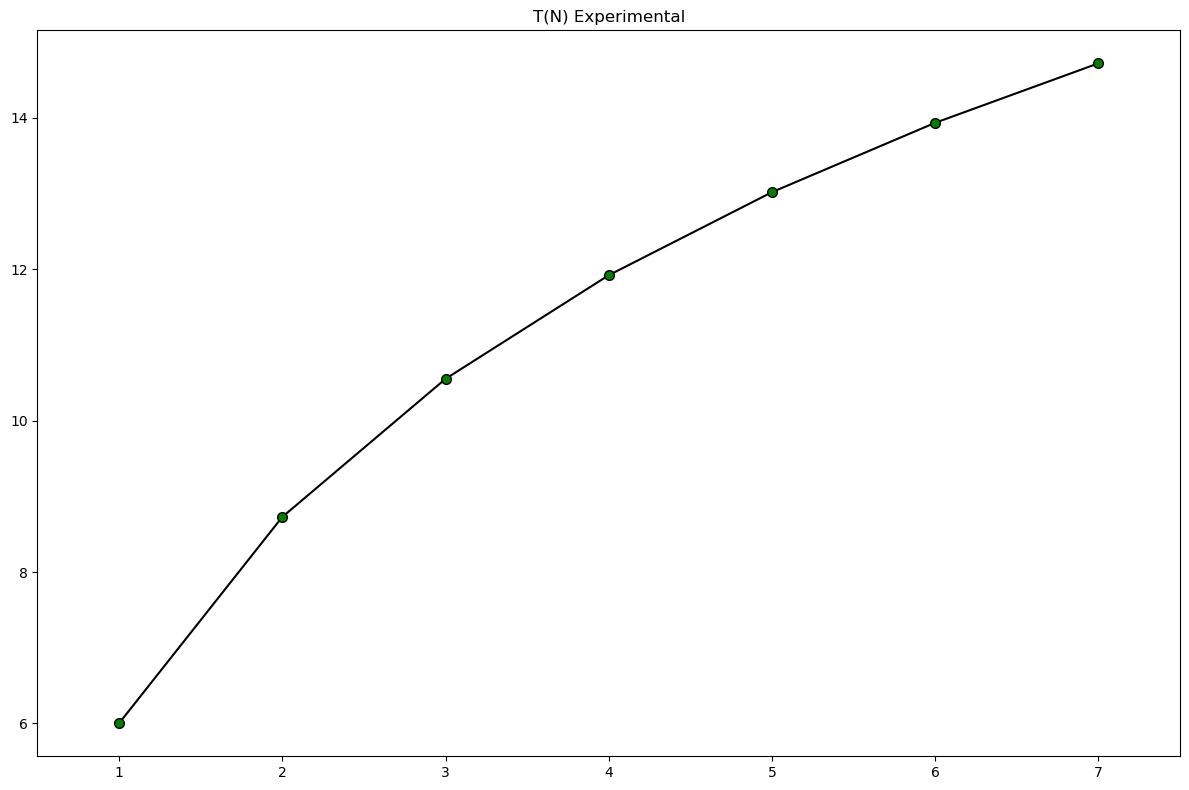

In [13]:
nTrials = 5000000
nDice0 = 1
nDice1 = 7
nDiceSkip = 1

x, n = SixesExperiments(nDice0, nDice1, nDiceSkip, nTrials)
print(n, nTrials, '\n', x)
    
fig, axs = plt.subplots(figsize=(12,8), tight_layout=True)
axs.plot(n, x, marker='.', ms=14., color='k', mfc='g')
axs.set(xlim = (nDice0 - 0.5, nDice1 + .5), title='T(N) Experimental')
plt.show()

#### First idea derivation


Let's suppose we begin with $N$ fractional dice. Each roll removes $1/6$ of the dice 
so that $5/6$ remain. For example the remainder of $N$ dice after five rolls is
$5/6\cdot 5/6\cdot 5/6\cdot 5/6\cdot 5/6 \cdot N = (5/6)^5 \cdot N$. If I set this 
remainder to 1 dice and permit the exponent to be real: 


$$\frac{5}{6}^r \cdot N = 1$$


$$r = \frac{\log{1/N}}{\log{5/6}}$$


Once I have a single dice remaining: It will take six rolls on average for it to come up six.


$$T = r + 6$$


#### First idea result


The first idea is actually not that bad. The curve has the right shape and does not seem to be
diverging from the experimental values. The calculation is consistently above the experimental 
value of course, corresponding to an underestimation of how quickly the dice will be set aside.
Anyway this is certainly not a precisely correct answer.

#### Second idea


Perhaps a 1/2 dice evaporates in a puff of probability smoke? That would eliminate this rather 
artificial "add 6 as the last step" business. Ok; in this case we have:


$$(5/6)^t \cdot N = 1/2$$


$$t = \ln \; (2N) / \ln \; (6/5)$$




In [33]:
# Experimental expectation for two dice

print(SixesExperiments(2, 2, 1, 10000000))

N =  2
([8.7283571], [2])


N =  1002



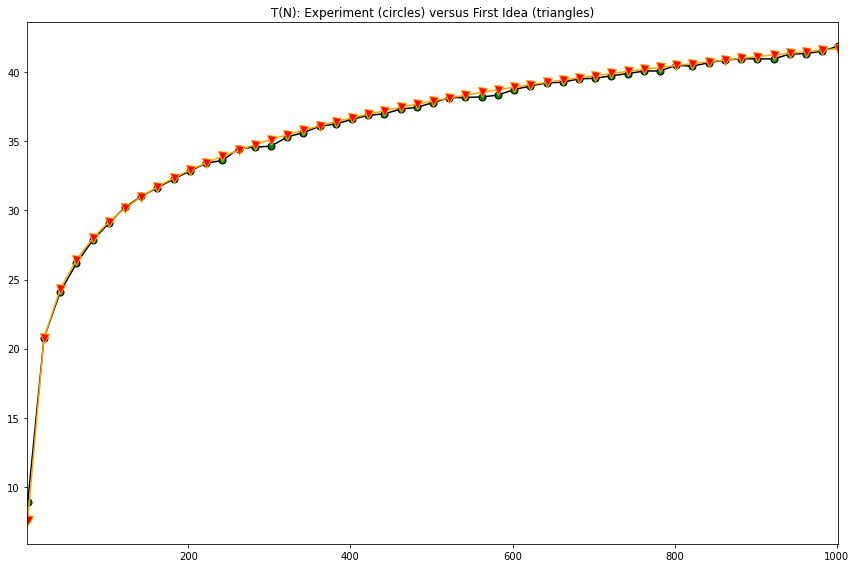

In [50]:
def calculate_idea_2(nDice0, nDice1, nDiceSkip):
    return [log(2*N)/log(6/5) for N in range(nDice0, nDice1 + 1, nDiceSkip)]

nTrials = 8000
nDice0 = 2
nDice1 = 1002
nDiceSkip = 20

x, n = SixesExperiments(nDice0, nDice1, nDiceSkip, nTrials)
c    = calculate_idea_2(nDice0, nDice1 + 1, nDiceSkip)

#### Second idea result 


This seems to work quite well for $N \ge 20$, though still a bit on the high side.



From here let's proceed more methodically towards a proper solution.



Here are the experimental results for dice = 1 to dice = 31:  


```
x = [5.98884, 8.73488, 10.5534, 11.95994, 13.05774, 13.97992, 14.69684, 15.43158, 16.03812, 16.54974, 17.06004, \
     17.49292, 17.91756, 18.35194, 18.71872, 19.00108, 19.30722, 19.6495, 19.9314, 20.24778, 20.50482, 20.71306, \
     20.97706, 21.21856, 21.42202, 21.625, 21.80258, 22.00674, 22.19882, 22.38124, 22.61838]
```


This can be improved by running more trials but it is a good empirical start, up to n = 31 dice.



### What is $T_1$?


This is simpler, just using a single dice, and this question was raised earlier: 
What is the expectation of the number of throws to get a 6 (or a 3 or whatever)?
This has to be easier than calculating $T_N$.


As a first step let's build the PDF and show that $\sum^{\infty}_{t=1}pdf_1(t) = 1$.



Clearly we can start at throw $1$ and say $pdf_1(1) = 1/6$. The complementary probability is
$P(\neg 6) = 5/6$. This gives us the key to $pdf_1(2)$ via **AND** reasoning: The probability
of rolling a six on the second throw means we throw a six (1/6 chance) **AND** we did not throw
a six on roll 1 (5/6 chance). So $pdf_1(2)=1/6\cdot5/6=5/36$.


The same logic applies to throws 3, 4, 5 and so on: $pdf_1(throw\;t) = (5/6)^{t-1} \cdot 1/6$.


Here we are back to using integer numbers of dice; no more fractional dice.

#### Is the CDF for this PDF equal to one?


In what follow, a reminder that the ***1*** subscript refers to playing the Sixes game with just one dice. 


Does $cdf_1(t \rightarrow \infty) = 1$? It had better!  


$cdf_1(t \rightarrow \infty) = \lim_{\tau \rightarrow \infty} \sum_{t = 1}^{\tau} \; \left( \frac{1}{6} \right) \cdot {\left( \frac{5}{6} \right)}^{t-1}$



This can be evaluated using a very pretty idea that I found in Apostol's Calculus Volume 1: 
For $0 \; < a \; < 1$ the series 


$S = 1 + a + a^2 + a^3 + a^4 + ... + a^t$


can be multiplied by $-a$ to produce a new series 


$$T = -a - a^2 - a^3 - a^4 - a^5 - ... - a^t - a^{t+1}$$


and when $S$ and $T$ are added together only the first and last terms remain:


$$S + T = 1 - a^{t+1}$$


The rest of the terms 'telescope' away to nothing. Writing $T$ as $-aS$: 


$$S \cdot (1 - a) = 1 - a^{t+1}$$


or


$$S = \frac{1 - a^{t+1}}{1 - a}$$

As a result the cumulative distribution function sum above becomes


$$cdf_1(t \rightarrow \infty) = \left( \frac{1}{6} \right) \lim_{\tau \rightarrow \infty} \frac{1 - (5/6)^{\tau+1}}{1 - (5/6)} = \left( \frac{1}{6} \right) \cdot 6 = 1$$


This cdf shows that $pdf_1(t)$ behaves properly; so we can be hopeful we are on the right track.


#### What is the expectation $T_1$?

We can next calculate the expectation value for the single die version of the Sixes game: 


$$T_1 = \sum_{t=1}^\infty t \cdot pdf_1(t).$$


Let's take the limit $n \rightarrow \infty$ for a finite sum of $n$ terms. To make notation easier I'll use $\alpha$ 
and $\beta$ for the two probabilities $1/6$ and $5/6$. The strategy here is similar to the telescoping series 
idea above. The variable $i$ ranges over the number of throws needed to roll a six.


$$T_1 = \lim_{n \rightarrow \infty} \sum_{i=1}^{n} i \cdot \frac{1}{6} \cdot \frac{5}{6}^{i-1} = \lim_{n \rightarrow \infty} \alpha \sum_{i=1}^{n}i\cdot \beta^{i-1}$$


$$b \cdot T_1 = \lim_{n \rightarrow \infty} \alpha \sum_{i=1}^{n}i \cdot \beta^{i}$$


$$T_1 \cdot (1-\beta) = \lim_{n \rightarrow \infty} \alpha \sum i \cdot \left( \beta^{i-1}-\beta^{i} \right) = \alpha \cdot \left( 1 - \beta + 2\beta - 2\beta^2 + 3\beta^2 - 3\beta^3 + ... + (n-1)\beta^{n-2} - (n-1)\beta^{n-1} + n\beta^{n-1} - n\beta^n \right)$$


$$T_1 \cdot \alpha = \lim_{n \rightarrow \infty} \alpha \left( 1 + \beta + \beta^2 + ... +\beta^{n-1}\right) - \alpha n \beta^n = \lim_{n \rightarrow \infty} \left( \sum_{i=1}^{n} 
\alpha \cdot \beta^{i-1}  - \alpha \cdot n \cdot \beta^{n}\right)$$


In the rightmost limit here: The left term is the cdf sum from above, equal to 1 
in the limit $n \rightarrow \infty$.
Showing the term on the right is zero in that limit is left as an exercise. Now replacing the
probabilities for $\alpha$ and $\beta$ we simply have 

$$T_1 \cdot \frac{1}{6} = 1$$


$$T_1 = 6$$

Good news! Because I will get the same result for rolling $5$, $4$, $3$, $2$, and $1$. After six throws I've covered all equivalent possibilities with no favorites.


So that is $T_1$. It remains to do the final jump to a pdf for $N$ dice and I'll have a solution for $T_N$.

#### What is $T_N$?


From $T_1$, solving for $T_2$ is instructive: It introduces the notion of multiple paths to finishing a trial on throw $t$. 


Suppose we reach throw $t$ and the trial has not yet ended; so we have made $t-1$ throws where at lease one of the
two dice has not been eliminated. The idea here is
to come up with a probability of completing the trial (the game of sixes) on this throw, throw $t$, for each
possible sequence of prior throws. Let's refer to these possible histories as (hopefully independent) paths. 
What the paths have in common is that at least one of the two dice has never come up a six in the
prior throws. 


Let's suppose that for a two-dice game the dice have labels $a$ and $b$; and we can write $a_6$ to indicate
that $a$ has come up a six at least one time in the prior $t-1$ throws. According to the description of the
game, once it comes up six it is set aside. However it is productive to imagine that we keep throwing it
in subsequent throws after it has come up six. More on this momentarily.


The alternative subscript $b_{\sim 6}$ indicates that
die $b$ has not come up a six in the throws prior to throw $t$.
Now let's denote the *conditional* probability of finishing the game on throw $t$ by $P_t(a_6, b_{\sim6})$.
This is specifically the case where die $a$ has come up six and die $b$ has not. 

This probability of finishing the game on throw $t$ is $1/6$ multiplied by the probability that 
$a$ came up six at least once in $t-1$ throws; in turn multiplied by the probability that 
$b$ never came up six in $t-1$ throws. This latter is a sequence of independent $AND$ probabilities,
hence the probability is the product $\frac{5}{6}^{t-1}$. 


How about the probability that $a$ has come up six at least once? This is a bit of a fine point. 
In the statement of the sixes game procedure, a die can only come up six once whereupon it is 
set aside. However, as noted above, this does not mean we may not *pretend*
to keep including it in subsequent throws. Whether it comes up six in those later 
throws is immaterial to the conclusion of the game. Coming up
six *once* is equivalent to coming up six *more than once*. By taking this approach
we have the pleasant conclusion that die $a$ coming up six *at least* once in $t-1$
throws is the conjugate probability to die $a$ having *never* come up six.


$P(six \; at \; least \; once) = 1 - P(never \; came \; up \; six) = 1 - {\frac{5}{6}}^{t-1}$

The probability of finishing the game on throw $t$ given $a_6$ and $b_{\sim6}$ is therefore
$P(a_6, b_{\sim6}) = \frac{1}{6} \cdot {\frac{5}{6}}^{t-1} \cdot (1-{\frac{5}{6}}^{t-1})$.


There are two more paths to consider: $a_{\sim6}, \; b_{6}$ and $a_{\sim6}, \; b_{\sim6}$.
The first of these is the same as the previous case. The second (where neither $a$ nor
$b$ have come up six in $t-1$ throws) is ${\big({\frac{5}{6}}^2\big)}^{t-1}$.

This together with some telescoping series arithmetic is sufficient to derive a closed
expression for $T_2$, using the index $t$ for throws and writing $\alpha$ for the
probability of rolling a six, $1/6$ and $\beta$ for $1-\alpha = 5/6$.


$$
T_2 = \sum_{t=1}^{\infty}t \cdot \big[ 2 \cdot P(a_6, b_{\sim6}) + P(a_{\sim6}, \; b_{\sim6})\big] = 
2 \alpha \frac{1}{1-\beta^2} + (\alpha^2 - 2 \alpha) \cdot \frac{1}{\big(1-\beta^2\big)^2} = 
8.7272727\dots
$$


In continuing fashion $T_3$ is not too dretful to calculate.

In [22]:
from math import pow

T5e6 = [6.000972, 8.7275464, 10.5524346, 11.922034, 13.0195468, 13.9360964, 14.7221392]

alpha = 1/6
beta = 5/6

def telescope(n): return 1/pow((1-pow(beta, n)), 2)

T1 = telescope(1)*alpha; print('T1:', round(T1,3), '...compare 6')
print()

T2  = telescope(1)*2*alpha;                   print(round(T2,3))
T2 += telescope(2)*(pow(alpha, 2) - 2*alpha); print('T2:', round(T2,4), '...compare 8.7275')
print()

T3  = telescope(1)*3*alpha;                                    print(round(T3,3))
T3 += telescope(2)*(3*pow(alpha, 2) - 6*alpha);                print(round(T3,3))
T3 += telescope(3)*(pow(alpha, 3) - 3*pow(alpha,2) + 3*alpha); print('T3:', round(T3,4), '...compare 10.5524')
print()

T4  = telescope(1)*4*alpha;                                                       print(round(T4,3))
T4 += telescope(2)*(6*pow(alpha, 2) - 12*alpha);                                  print(round(T4,3))
T4 += telescope(3)*(4*pow(alpha, 3) - 12*pow(alpha,2) + 12*alpha);                print(round(T4,3))
T4 += telescope(4)*(pow(alpha, 4) - 4*pow(alpha,3) + 6*pow(alpha,2) - 4*alpha);   print('T4:', round(T4,4), '...compare 11.9220')
print()

T5  = telescope(1)*( 5 * pow(alpha, 1))                                                                         ; print(round(T5,3))
T5 += telescope(2)*(10 * pow(alpha, 2) - 20*pow(alpha,1))                                                       ; print(round(T5,3))
T5 += telescope(3)*(10 * pow(alpha, 3) - 30*pow(alpha,2) + 30*pow(alpha,1))                                     ; print(round(T5,3))
T5 += telescope(4)*( 5 * pow(alpha, 4) - 20*pow(alpha,3) + 30*pow(alpha,2) - 20*pow(alpha, 1))                  ; print(round(T5,3))    
T5 += telescope(5)*( 1 * pow(alpha, 5) -  5*pow(alpha,4) + 10*pow(alpha,3) - 10*pow(alpha, 2) + 5*pow(alpha, 1)); print('T5:', round(T5,4), '...compare 13.02478276')
print()
print(T5, 'in more detail for T5')
print('compare after 5e6: 13.0215458')

T1: 6.0 ...compare 6

12.0
T2: 8.7273 ...compare 8.7275

18.0
8.182
T3: 10.5554 ...compare 10.5524

24.0
4.364
13.858
T4: 11.9267 ...compare 11.9220

30.0
-2.727
21.009
11.352
T5: 13.0237 ...compare 13.02478276

13.023661507555333 in more detail for T5


```
5000000 13.0215458
10000000 13.0236118
15000000 13.023295666666666
20000000 13.0242036
25000000 13.02403928
30000000 13.023942633333334
35000000 13.023507485714285
40000000 13.0235166
45000000 13.0235964
50000000 13.02352014
55000000 13.023659981818183
60000000 13.02370065
65000000 13.023721246153846
70000000 13.023640442857143
75000000 13.023693226666667
80000000 13.0235694125
85000000 13.023540870588235
90000000 13.023606622222223
95000000 13.023794421052632
100000000 13.02353101
105000000 13.023552123809523
110000000 13.023581790909091
115000000 13.023540452173913
120000000 13.023646675
125000000 13.023367792
130000000 13.023414446153847
135000000 13.023502940740741
140000000 13.023549164285715
145000000 13.023495944827586
150000000 13.02354508
155000000 13.023503
160000000 13.0235265875
165000000 13.023514206060606
170000000 13.023563905882353
175000000 13.023560394285715
180000000 13.023520383333333
185000000 13.023424594594594
190000000 13.02336645263158
195000000 13.02332765128205
200000000 13.02328828
205000000 13.023216839024391
210000000 13.023151342857142
215000000 13.023235962790698
220000000 13.023231318181818
225000000 13.02328776
230000000 13.023290743478261
235000000 13.02332854893617
240000000 13.023267783333333
245000000 13.023335428571428
250000000 13.023382568
255000000 13.023500321568628
260000000 13.023538426923077
265000000 13.023506505660377
270000000 13.023529466666666
275000000 13.023479225454546
280000000 13.023514053571429
285000000 13.02356172982456
290000000 13.023534189655173
295000000 13.0235502
300000000 13.023597866666666
305000000 13.02357649180328
310000000 13.023533022580645
315000000 13.023556526984127
320000000 13.02353788125
325000000 13.023546313846154
330000000 13.023541566666667
335000000 13.02350876119403
340000000 13.023537435294118
345000000 13.023588733333334
350000000 13.023673822857143
355000000 13.023607583098592
360000000 13.023612333333332
365000000 13.02356377260274
370000000 13.023614918918918
375000000 13.023653536
380000000 13.023638660526316
385000000 13.023657587012988
390000000 13.023621997435898
395000000 13.023613437974683
400000000 13.023642625
405000000 13.023669066666667
410000000 13.02360741707317
415000000 13.023618971084337
420000000 13.023584097619048
425000000 13.023557889411764
430000000 13.023601106976745
435000000 13.023549197701149
440000000 13.023539095454545
445000000 13.023515173033708
450000000 13.023500375555555
455000000 13.023540661538462
460000000 13.023510056521738
465000000 13.023551141935483
470000000 13.023544138297872
475000000 13.023536181052632
480000000 13.023519166666667
485000000 13.023521319587628
490000000 13.023562489795918
495000000 13.023566537373737
[5] [13.023542712]
```

In [27]:
x, n = SixesExperiments(5, 5, 1, 500000000, 5000000)
print(n, x)

5000000 13.0215458
10000000 13.0236118
15000000 13.023295666666666
20000000 13.0242036
25000000 13.02403928
30000000 13.023942633333334
35000000 13.023507485714285
40000000 13.0235166
45000000 13.0235964
50000000 13.02352014
55000000 13.023659981818183
60000000 13.02370065
65000000 13.023721246153846
70000000 13.023640442857143
75000000 13.023693226666667
80000000 13.0235694125
85000000 13.023540870588235
90000000 13.023606622222223
95000000 13.023794421052632
100000000 13.02353101
105000000 13.023552123809523
110000000 13.023581790909091
115000000 13.023540452173913
120000000 13.023646675
125000000 13.023367792
130000000 13.023414446153847
135000000 13.023502940740741
140000000 13.023549164285715
145000000 13.023495944827586
150000000 13.02354508
155000000 13.023503
160000000 13.0235265875
165000000 13.023514206060606
170000000 13.023563905882353
175000000 13.023560394285715
180000000 13.023520383333333
185000000 13.023424594594594
190000000 13.02336645263158
195000000 13.023327651282

In [ ]:
T = [5.98884, 8.73488, 10.5534, 11.95994, 13.05774, 13.97992, 14.69684, 15.43158, 16.03812, \
     16.54974, 17.06004, 17.49292, 17.91756, 18.35194, 18.71872, 19.00108, 19.30722, 19.6495, \
     19.9314, 20.24778, 20.50482, 20.71306, 20.97706, 21.21856, 21.42202, 21.625, 21.80258, \
     22.00674, 22.19882, 22.38124, 22.61838]

$T_N$ extends these ideas to the generalization: At throw $t$ for $n$ dice there are $n-1$ possible numbers of dice (paths) that have not yet come up six.
We sum over these possibilities, weighting each by its binomial coefficent (n-choose-j) to account for the ways-within-the-way. From there it is a matter of
assembling the probability expression for concluding the trial on this throw. From this we can calculate the expectation either in polynomial form or
by means of summing over an adequate range of throws.


In the double sum that follows note that the index $t$ runs from 1 to $\infty$ being the number of throws needed to finish the game, and the index $i$ runs from $1$ to $N$, the number of dice we play the game with. Since the pdf is a function of throw number (what is the probability of finishing the game on throw $t$) it is written as $pdf_N(t)$ for a game of Sixes that begins with $N$ dice. 


I first describe the form of the PDF: Suppose that the game is to end on throw $t$. Then there are between one and $N$ dice remaining after $t-1$ throws, i.e. $N$ cases to consider. For each case there is a certain probability of the game ending on throw $t$.  


the PDF for throw $t$ must therefore be a sum from $1$ to $N$ of the odds of rolling one $6$, two $6$'s, three $6$'s, ..., $N$ $6$'s, all weighted by the probability of having respectively those many dice remaining after $t-1$ throws. This is a sum over the number of ways to finish the game on throw $t$. In other words the PDF is the sum of $N$ individual probabilities of finishing on throw $t$ that account for all the ways of ''not'' having finished the game after the previous $t-1$ throws.  


Rather than bulldoze ahead to a form for the PDF I would like to proceed a little bit more retrograde as it makes the writing easier to do. So I will claim that the PDF can conveniently be written as a sum (over $N$ dice) of the product of four functions, to be elaborated in a bit: $pdf_N(t) = \sum_{i=1}^N F_1(i) \cdot F_2(i) \cdot F_3(i, t) \cdot F_4(i, t)$


so that (assuming it to be a valid PDF) the solution for $T_N$ will introduce a second sum over an infinite number of throws, to look like this: 


$$T_N = \sum_{t = 1}^{\infty} \sum_{i = 1}^N t \cdot F_1 \cdot F_2 \cdot F_3 \cdot F_4$$


where


$$F_1 = {\left( \frac{1}{6} \right)}^i$$         


$$F_2 = \binom{N}{i}$$


$$F_3 = { \left( \frac{5}{6}^{i} \right) }^{t-1}$$


$$F_4 = { \left( 1-\frac{5}{6}^{t-1} \right) }^{N-i}$$


$i$ is the number of dice that have not yet rolled a six.
$F_1$ is the probability of rolling $i$ sixes on throw $t$. 


$F_2$ is from combinatorics: The number of ways of choosing $i$ dice 
from among $N$ dice. This is because there are usually multiple subsets
of the $N$ dice that can appear before throw $t$ as $\sim6$.


The last two factors $F_3$ and $F_4$ are respectively the probability that those $i$ dice never came up $6$ in $t-1$ throws...
and the probability that the other $N - i$ dice came up six 'at least once' in $t-1$ throws. 


With these four factors we have covered the probability for index $i$.  



$$T_N = \sum_{t = 1}^{\infty} \sum_{i = 1}^N t \cdot {\left( \frac{1}{6} \right)}^i \cdot \binom{N}{i}
\cdot { \left( \frac{5}{6}^{t-1} \right) }^i \cdot { \left( 1-\frac{5}{6}^{t-1} \right) }^{N-i}.$$

or


$$
T_N = \sum_{t = 1}^{\infty} \sum_{i = 1}^N \frac{t}{6^{it}} \cdot \binom{N}{i} \cdot 5^{it-i} \cdot { \left( \frac{6^{t-1}-5^{t-1}}{6^{t-1}} \right) }^{N-i}
$$


This answer may have some nicer form but I haven't found it yet. (Some more things to do here are listed below, including that idea.) The computer of course can give a precise "actual number" for $T_N$ by adding up the double sum (with only a finite number of terms for $t$) and so for example if you begin with $19$ dice it should take about ____missing____ throws to win the game on average. 

Incidentally if you'd like to look at another problem along these lines, it is cast (sic) Recruiter Problem|here as the "recruiter problem".


### Loose Ends


* '''Can TN be simplified algebraically? Approximated? I don't know just yet.'''
* '''Does <T> match <Tbad> for large N? T-cheater using N+1?'''
* '''Digressions: BinThm, Fibonacci, Generating functions for <t^n>'''
* '''More messy combinatorics: Derive expected sum of N dice'''
* '''More on Radioactive Decay as a random process with an eye to Zircon'''
* I notice that our dice behave like unstable atoms waiting around to fall apart, where throws are ticks of a clock. Is my initial "wrong" guess more applicable when we consider huge numbers of atoms, i.e. is it a suitable approximation for large N?

## Birthdays and more probability logic


$n$ people arrive at a party and everyone shakes hands with everyone else. As they do so each person 
announces their birthday. What is the probability that at least one pair of persons have the same
birthday? We take a year to be $365$ days long and we take birthdays to be uniformly, randomly
distributed. 


The probability of one pair of people having the same birthday is $1/365$. The sum of probabilities
will be $1/365 + 1/365 + \dots + 1/365 = \binom{n}{2} \cdot \frac{1}{365}$. 
But we know that this number is too large because it over-counts when more than one pair of 
people have the same birthday. So we could do the 'sum of products' approach
above and be done.


But wait! Is this an alternative approach?


Let us do $a$ trials of this party. Label the first two guests $1$ and $2$. 


- 1 and 2 share a birthday on $\frac{a}{365}$ of the $a$ trials.  
    - $a - \frac{a}{365}$ trials remain. 
    - We do not care if other people share birthdays on those first $\frac{a}{365}$ trials: irrelevant
    - Of the remaining trials...
        - $\frac{a-\frac{a}{365}}{365}$ have 1 and 3 sharing a birthday
        - Add this to our cumulative probability of joint birthdays
        - Now $a - \frac{a}{365} - \frac{a - \frac{a}{365}}{365}$ trials remain
           - ...and so on until all $\binom{n}{2}$ possible pairs are exhausted


Principle: When there are many ways of succeeding: Use complementary probability. 
Suppose success is $this \cup this \cup this \cup \dots \cup this$
Check the converse: $\neg this \cap \neg this \cap \neg this \dots \cap \neg this$
allows us to multiply probabilities. And then $P(success) = 1 - P(failure)$.


$$P(n\;people: \;one+\;shared\;birthday)\;=\;1\;-\;P(two\;people:\;no\;shared\;birthday)^{pairs\;of\;people}$$

$$P(shared \; birthday) = 1 - \left( \frac{364}{365} \right)^{\binom{n}{2}}$$

For the matter of "Either C or S or BOTH" occurs we have (36 + 36)/144; so this means at least one of S and C 
happens 1/2 of the time. Notice that P(C) + P(S) = 1/4 + 1/3 = 7/12 which ''overcounts'' because there are 
some days on which both occur. P(C) + P(S) counts those days twice, so we subtract away one of those as 
P(C AND S) to arrive at the correct result of 1/2. 7/12 - 1/12 = 1/2, so 1/12 must be P(C AND S), 
which is P(C) x P(S); so the "AND" implies multiplication of independent probabilities.


This *counting of ways* means that we count the number of possible outcomes, we count the number of desired outcomes, 
and set the probability of the desired outcome as the ratio of desired to possible outcomes. In the process we 
have to take care not to count some outcomes more than once.

Now consider the following two events in the *dependent* case:


* D: I drive from my home to the post office parking lot.
* W: I walk from the parking lot into the post office.


In this case W is dependent on D because I only have the option to walk inside if I first drive to the parking lot. Suppose P(D) is 1/4 and P(W) is 1/3, but we require that W can only happen if D happens. In fact a better way to write this is P(D) = 1/4, P(W | D) = 1/3, and P(W | !D) = 0. This last means there is no way W can happen if "Not-D" happens. If I don't drive to the parking lot I can't possibly then walk inside.

Now we have the same questions to compare with the independent case above: 


* Outcome D (never mind whether W happens) has probability 1/4 just as before.
* Outcome W (only possible if D happens) has probability P(D)*P(W|D) = 1/12. 
* Probability both D and W happen = P(D)*P(W). This will be 1/12 as in the previous line.
* Either D happens or W happens or both happen = P(D) = 1/4.


Again the last line requires some thought. W will happen only if D happens. But if D happens then the result will be true regardless of whether W happens, so W is irrelevant to the total question. In this second example I've looked at how a dependency can completely alter the manner in which probabilities are calculated in relation to the first example. 

Notice that the third case, P(D and W), comes out 1/12 just as above where C and S were independent of one another. This is interesting because there is (in both cases) a dependence built into the use of the word 'and'. That is, we have a subtle distinction between the nature of the events and whether they depend upon one another. In the first case with C and S independent, the outcome question "Do C and S both happen?" ties them together. In the second case "Do D and W both happen" also ties together two probabilities, but W is already tied to D by it's definition. The nature of the question we ask about the final outcome has built into it the nature of the constituent events.


The main point here is that independent events (including the numbers rolled on dice) are not too bad to work with in questions of probability. The particular result of note is that the probabilities of independent events are multiplied to arrive at the probability that they both occur.

'''The probability of several independent events all happening is the product of the probabilities of the individual events. This is the "AND" rule which corresponds to multiplication of probabilities.'''

#### Final example here: What number do I expect to roll on a single throw of a die?

As noted the PDF for a single die roll is {1/6, 1/6, 1/6, 1/6, 1,6, 1/6}. My expected roll is therefore 


$1 \cdot \frac{1}{6} + 2 \cdot \frac{1}{6} + ... + 6 \cdot \frac{1}{6} = 3.5$

On average a single die comes up 3.5 (even though it never comes up 3.5 in practice). Similarly if I evaluate my die throw as the square of the number of pips, that is, if my Quantity of Interest is $\;pips^2$ then my expected outcome is 


$1 \cdot \frac{1}{6} + 4 \cdot \frac{1}{6} + ... + 36 \cdot \frac{1}{6} = 15.17$

#### Idea 6 for the Sixes game

$\; F_3 = { \left( \left( \frac{5}{6} \right) ^{t-1} \right) }^i$ is a compound idea.
We suppose that there are $i$ dice remaining that have never -- on the prior $t-1$ throws -- come up six.
What is the probability of this happening?
First: The probability for rolling never-six on one die thrown $t-1$ times is $\;\left( \frac{5}{6} \right)^{t-1}$. 
Second: We have to consider the probability that ***none*** of $i$ dice has come up six: The first die did not; 
*and* the second did not; *and* so on. These are independent events so the collective probability is
the product of the probabilities for each die; which is how we arrive at $F_3$.



$\; F_4 = { \left( 1-\left(\frac{5}{6}\right)^{t-1} \right) }^{N-i}$ is similar and makes use of complementary probability: $P(X) + P(!X) = 1$. 
Consider one of the remaining $N-i$ dice. The probability it has never come up six is just, as above, 
$\left( \frac{5}{6} \right)^{t-1}$.
Therefore the probability that this die came up six *at least once* is a complementary probability: $1-\left( \frac{5}{6} \right)^{t-1}$.
Now that we have this probability for one die we can raise it to the $N-i$ power to reflect the *and* nature 
of the statement 'All of the remaining $N-i$ dice have come up six at least once', which is $F_4$.

We have now selected out $i$ dice and determined the probability they all come up six on throw 't', ending this run of the game.
In terms $\;F_1$ and $\;F_2$ we account for ways of choosing $i$ dice and having them all come up six on throw $t$. This relies
upon $\;F_3$ and $\;F_4$ that reflect the probability that the set of $i$ dice have never come up six on the first $t-1$ throws
*and* the remaining $N-i$ dice have come up six at least one time.


It is worth remarking that 'setting a die aside' after it has come up six is, for the purposes of this problem, 
the same as continuing to include it in later throws. Those later throws (regardless of what that die comes up)
have no bearing on the 'status' of that die as having come up six.


[5.9999999999999725, 8.727272727272675, 10.555444555444476, 11.926696254564987, 13.02366150755518, 13.937796697320225, 14.72134159626182, 15.406943477881335, 16.016367366483593, 16.564848861259115, 17.063468401584434, 17.520536313824564, 17.942445155979833, 18.334217652260893, 18.699871982111834, 19.04267291634439, 19.365309089740524, 19.67002103128199, 19.95869550221614, 20.23293624960356, 20.49411791378193, 20.743427684134048, 20.98189789925345, 21.21043185540953, 21.42982445331939, 21.640778874386562, 21.843920168747513, 22.039806416881337, 22.22893796680362, 22.411765131728487, 22.588694646171913]
[6.000000000000001, 8.727272727272728, 10.555444555444556, 11.926696254565107, 13.023661507555326, 13.937796697320394, 14.721341596262038, 15.406943477881587, 16.016367366483916, 16.56484886125957, 17.06346840158508, 17.520536313825325, 17.942445155981133, 18.334217652263735, 18.699871982117646, 19.04267291635502, 19.365309089761883, 19.67002103131705, 19.958695502306462, 20.2329362497553

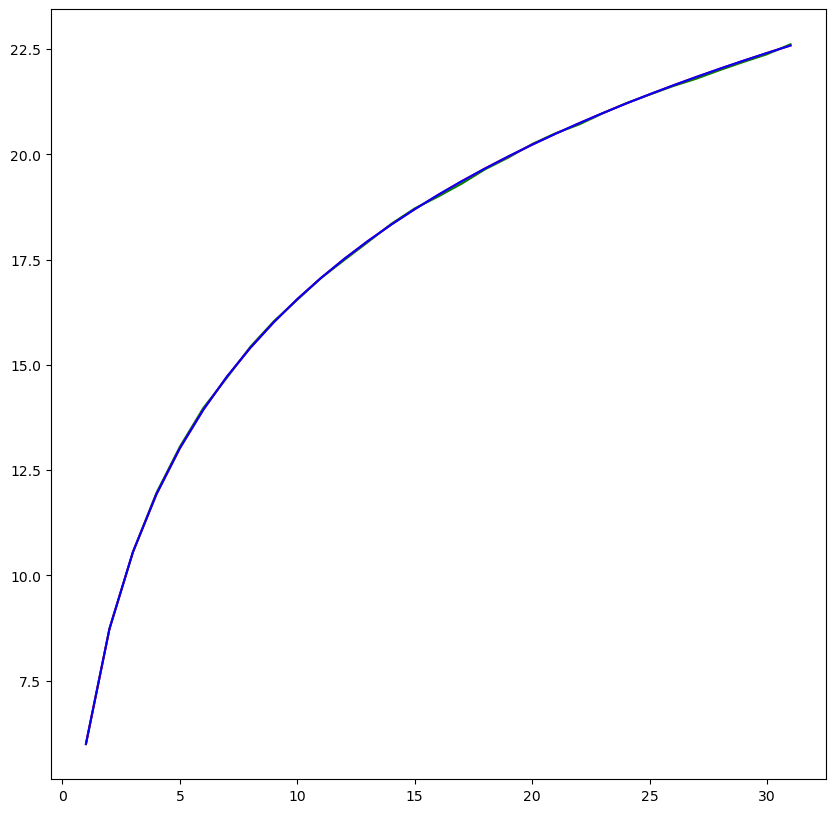

In [42]:
import numpy as np
from math import comb

def Tn(n, alpha):
    '''
    Calculate the expectation for the dice game using n dice.
    This is done using a double sum: Over both dice and throws.
    Since the throws sum is infinite this is an approximation.
    '''
    infinity_t = 200
    beta = 1 - alpha
    pdf = 0.
    T = 0.
    for t in range(1, infinity_t + 1):
        Fsum = 0.
        for i in range(1, n + 1):
            F1 = np.power(alpha, float(i))
            F2 = float(comb(n, i))
            F3 = np.power(np.power(beta, float(t-1)),float(i))
            F4 = np.power(1.-np.power(beta,float(t-1)),float(n-i))
            Fsum += F1*F2*F3*F4
        pdf += Fsum
        T += float(t) * Fsum
    return T

def Tn_OneSum(n, alpha):
    '''
    This is the expectation calculated as a single sum; the 
    sum over throws is removed via telescoping series. 
    '''
    beta = 1 - alpha
    T = 0
    for i in range(1, n + 1):
        denom_base = 1-pow(beta, i)
        beta_i = 1./pow(denom_base, 2)
        c_i    = comb(n, i)
        term1  = pow(alpha - 1, i)
        term2  = pow(-1, i-1)
        this_i = (term1 + term2)*beta_i*c_i
        T += this_i
    return T

# empirical:
x = [5.98884, 8.73488, 10.5534, 11.95994, 13.05774, 13.97992, \
     14.69684, 15.43158, 16.03812, 16.54974, 17.06004, 17.49292, \
     17.91756, 18.35194, 18.71872, 19.00108, 19.30722, 19.6495, \
     19.9314, 20.24778, 20.50482, 20.71306, 20.97706, 21.21856, \
     21.42202, 21.625, 21.80258, 22.00674, 22.19882, 22.38124, 22.61838]  

T, T1, ndice = [], [], []
for n in range(1, 32):
    T.append(Tn(n, 1/6))
    T1.append(Tn_OneSum(n, 1/6))
    ndice.append(n)
    
print(T)
print(T1)
print(x)

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(ndice, x, color='green')
ax.plot(ndice, T, color='red')
ax.plot(ndice, T1, color='blue')
plt.show()

$T_N = \sum_{t = 1}^{\infty} t \cdot \sum_{i = 1}^N F_1 \cdot F_2 \cdot F_3 \cdot F_4$


$F_1 = {\left( \frac{1}{6} \right)}^i$     


$F_2 = \binom{N}{i}$


$F_3 = { \left( \frac{5}{6}^{t-1} \right) }^i$


$F_4 = { \left( 1-\frac{5}{6}^{t-1} \right) }^{N-i}$


## Recruiter Problem: Introduction

This page describes and solves a probability problem similar to the Sixes problem.


### Problem

A recruiter has a list of potential recruits ranked in order: 1, 2, 3, .... She wishes to hire $N$ of them and to make the problem simple we assume they each have the same probability $a$ of saying Yes when offered the job. She begins at the top of her list and offers the job in order to people until she has $N$ yesses. The problem is stated one way like this: How many people do we expect will get offered the job? 


A second problem considered here is how to derive $a$ given a different piece of information, namely that the probability of person $M$ in the list being offered the job is very small. This is in the spirit of the original question: "What are my chances of getting offered the job if they are looking for 10 people at a time and they never have to ask more than 30?"


### What is the expected number of asks?

As with the Sixes problem we take the standard 'probability distribution function' approach:


* We're given $a$ and $N$.
* Figure out what the probabiltiy is of hiring $N$ people on precisely $n$ asks, $P_{n}$.
* Calculate the sum over all outcomes $<n> = \sum_{n=N}^{\infty} n \cdot P_{n}$.


I am enjoying writing up this problem because of the solving process I went through. It started out easy, then got harder and harder (as I tried to follow thinking from the Sixes problem), and then finally it got ridiculous. I then fell off Ridiculous Mountain with a small piece of the solution and after I looked at that for a few minutes I realized it was enough. In other words I had been dogmatically making the problem much harder than it was.


### What is $pdf(n)$?

After $n-1$ asks, the only way we can finish on ask $n$ is for there to be exactly $N-1$ acceptances so far. The number of ways of choosing $N-1$ people from $n-1$ people asked is $\binom{n-1}{N-1}$.


The probability that $N-1$ people all accept the offer is $a^{N-1}$. But all the remaining $n-1-(N-1)$ people must decline the offer, an *and* condition (so multiply), with probability $(1-a)^{n-1-(N-1)}$. 


So counting up all the ways of selecting $N-1$ lucky people from among $n-1$ and multiplying by the odds of those $N-1$ accepting and the remainder declining, we have the probability of reaching person $n$ with one job opening left. Then multiply that by $a$ to get the probability of finishing the recruitment process with this $n$th person. 


$$pdf(n) = a \cdot \binom{n-1}{N-1} \cdot a^{N-1} \cdot (1-a)^{n-N}$$



### What is $<n>$?


We immediately get the expectation for the number of people asked <math>\;<n></math>:


$$<n> \; = \; {\left(\frac{a}{1-a}\right)}^{N}\;\sum_{n=N}^\infty n \cdot \binom{n-1}{N-1} \cdot {(1-a)}^{n}$$



### What is $a$ given $k$?

Before going further with this I should mention that I didn't go to the trouble of verifying that the pdf sums to $1$. Which it must if it is a good pdf (per the Sixes problem). Assuming this is ok then we can move on to the $k$ problem:


Take a small number $\epsilon$ and say that the probability of person $kN + 1$ being offered the job is less than that. Roughly speaking we can translate this to set the cumulative distribution function or cdf equal to $1 - \epsilon$ for $n = k \cdot N$. So here $k$ is just some multiplier greater than one to indicate the likely range of "asked" candidates from the ordered list. With $k$ and $N$ fixed we can proceed to solve for $a$, the probability that a person when asked will accept the job.


$$1 - \epsilon = {\left(\frac{a}{1-a}\right)}^{N} \cdot \sum_{n=N}^{\infty}\binom{n-1}{N-1} \cdot {(1-a)}^{n}$$



Reducing this to a polynomial in $a$ looks pretty dreadful, let alone solving it, so either there are some nice ways to fix this up or it will only lend itself to a computer solution. One thought is to set $a$ to $1/2$ and pick small values of $N$ and $k$ to see what $\epsilon$ looks like, or vice versa.


* As with the Sixes problem: Need to write some code, choose a few examples, put in some charts.

## Bayesian stuff

***I think a really good problem to try and solve (motivated once again at least in part by Knuth) is given a distribution of observed sum rolls for two dice: What are the numbers written on the dice?***

Bayesian Inference and Data Analysis: A Bayesian Tutorial. 

The purpose here is to arrive at a method called '''''MCMC''''' from not first principles but at least a sketch of them.


### MEX-EX and Bayes Theorem

Let's make an observation '''A''' and suppose that this is somehow (perhaps?) causally connected to a set of driving conditions <math>B = {B_i}</math>. Furthermore suppose that those conditions are mutually exclusive and exhaustive, hence MEX-EX (my term). The connection between A and B is not deterministic but rather probabilistic. For example A might be the temperature of an outdoor thermometer and the B's might be seasons. This situation is the set-up for both the theorem of Bayes and for a system of inferring information in a probabilistic setting called ''Bayesian Inference''. And Bayesian Inference is carried to a broader set of ideas called Bayesian Analysis. 


First point: MEX-EX seems to be a (useful) analog to a pdf: The sum of <big><math>P(B_i)</math></big> must be 1. 


Second point: There is an implicit model relating dependent probabilities that works in both directions. Or it should eventually become an explicit model, case by case. One of the important ideas here is that the model itself is up for grabs: It might be good, it might be lousy; and we try and let the data tell us which within the Bayesian framework.


So on to Bayes' Theorem.


$$
P(B_i|A) = 
\frac{P(A|B_i)\;\cdot\;P(B_i)}{\sum_{j} P(A|B_j)\;\cdot\;P(B_j)}
$$


This derives from the definition of the probability of both A and Bi occurring, written P(A, Bi). I won't bother formatting Bi to save time. Clearly P(A, Bi) = P(A|Bi) x P(Bi). The probability of the temperature being 5 deg C and it being winter is the probability of a 5 deg temperature when it is winter (estimated at 0.05) times the probability that it ''is'' winter (at an arbitrary date this is 0.25). So that gives me a probability of it being 5 deg C and winter as 1/80.


I will say, by the way, that both temperature and season are ''states'' of the system (the authors say 'of nature'); but they stick with the idea that A is an observation and {Bi} are the MEX-EX states. I arbitrarily state that in winter the temperature is between -9 and +10 each with equal probability; so that is how I got to 1/20. But do I believe that the chances that it is winter and 5 deg are 1/80? Let's do the same with two dice. 


What are the chances of box cars? 1/36. P(6|6) = 1/6 and P(6) = 1/6 so that works for independent events. I think the idea is ok for now. So onward with a particular Bi:


P(Bi, A) = P(A, Bi) is ok.


So P(Bi|A)P(A) = P(A|Bi)P(Bi) is ok.


So P(Bi|A) = P(A|Bi)P(Bi)/P(A) is ok.


And then finally we say that the some of all conditional probabilities for A over the various B's is, in total, the probability of A since the B's are MEX-EX. That's only fair. So now that's Bayes' Theorem.   

Inference follows: Your dependency model across all MEX-EX states is the characterization of reality that determines probabilities of independent states given your observation A. What is your model? It is a set of two probability distributions: P(A|Bi) and P(Bi) for all I.

# Appendix: Another run at Probability and Combinatorics

## Introduction


Let's introduce starting ideas and terminology.


#### Randomness

* Future events can be random: Outcome not predictable
* Probability concerns *consistent randomness*
* Questions in probability are often answerable by counting possibilities
* Fortunately we have **combinatorics**, the mathematics of counting 
* It includes the *factorial* function
* The factorial is used to build the *combination* function
    * The factorial function converts a positive integer or zero into a positive integer result
    * The combination function converts two non-negative integers into a positive integer result


#### Sets

- Set: A collection of distinguishable things with no *order*
- Size: The number of elements in a set
- Empty set: A set with size zero, written ${\large \emptyset}$
- Bounded size: A set size that is less than some definite positive integer
- Subset: A set consisting of zero or more elements of a parent set
- Proper subset: Has size strictly less than the size of its parent set
- Counting: Determining the size of a set by corresponding its elements to ordered positive integers 1, 2, 3, ...
- Countable infinity: A set that can be counted but whose size is unbounded


#### Factorials
- Factorial of a positive integer: The product of all positive integers less than or equal to that number
- $0!=1$: Zero also has a factorial despite not being a positive integer; and that factorial is 1.


#### Combinations
- Choice / choosing: The act of creating a subset from a set of elements
- Combination: The number of possible subsets of a given size disregarding the *order* of subset elements
    - The number of b-element subsets of an a-element set is written $\binom{a}{b}$
        - This can be calculated as follows: $\binom{a}{b} = \frac{a!}{b! \cdot (a-b)!}$
    - There is but one choice of a subset consisting of *all* elements of a set: $\binom{a}{a}=1$
    - There is but one choice of a subset consisting of *zero* elements of a set: $\binom{a}{0}=1$
- Choosing $b$ elements from a set of $a$ elements divides the set into two subsets
 
 
#### Permutations


- Permutation: Counting subsets when the *order* of subset elements matters

  
### Combination examples


${\large \binom{3}{1} = \frac{3!}{1!\;\cdot\;(3-1)!} = \frac{3\cdot2\cdot1}{1\cdot2\cdot1}=3 }$


${\large \binom{4}{2} = \frac{4!}{2!\;\cdot\;(4-2)!} = \frac{4\cdot3\cdot2\cdot1}{2\cdot1\cdot2\cdot1}=6 }$


${\large \binom{7}{3} = \frac{7!}{3!\;\cdot\;(7-3)!} = \frac{7\cdot6\cdot5\cdot4\cdot3\cdot2\cdot1}
{3\cdot2\cdot1\cdot4\cdot3\cdot2\cdot1}=35 }$


${\large \binom{7}{4} = \frac{7!}{4!\;\cdot\;(7-4)!} = \frac{7\cdot6\cdot5\cdot4\cdot3\cdot2\cdot1}
{4\cdot3\cdot2\cdot1\cdot3\cdot2\cdot1}=35 }$


Notice above that $\binom{7}{3}=35$ and $\binom{7}{4} = 35$. If $\binom{7}{3}=\binom{7}{4}$ then is it also true that $\binom{7}{2}=\binom{7}{5}$ and $\binom{7}{1}=\binom{7}{6}$? Is it true that $\binom{7}{0}=\binom{7}{7}$?  


What is the eighth row of the Pascale triangle? (See the **Meru Prastarah** notebook.)
What is the sum of that row?



### Probability Problem


What is the probability of flipping a coin three times and getting three tails? 


**Solution** Let's count possible results.


```
heads heads heads
heads heads tails
heads tails heads
heads tails tails
tails heads heads
tails heads tails
tails tails heads
tails tails tails
```


This is an example of consistent randomness: The result of three coin tosses will consistently be one of 
these outcomes. 


Only one of these outcomes is 'three tails' so the answer is **one of eight**, or as a fraction **$1/8$** or **$0.125$**. 


Each toss has *two* possible results (heads or tails) and we made *three* tosses in a row. 
The denominator of the result probability is $8 \; = \; 2^3$. Coincidence?
Check one flip, two flips and four flips.


Let's re-write the possible results above (heads/tails) using zeros for heads and ones for tails. 


```
0 0 0 
0 0 1
0 1 0
0 1 1
1 0 0
1 0 1
1 1 0
1 1 1
``` 

These are counting numbers in base-2 or *binary*. The probabilities of
coin flipping correspond in some way to binary counting. This is an example of 
the connection between probability and counting.

### The factorial


Zero factorial is written as $0!$ and it is equal to one: $0! = 1$.

One factorial is also equal to one: $1! = 1$.

Two factorial is equal to two: $2! = 2$. 

This is easy so far but now it becomes more complicated. 

Three factorial is six and four factorial is $24$. Here we go: 

$$3! \;=\;3\;\cdot\;2\;\cdot\;1\;\cdot\;=\;6$$

$$4! \;=\;4\;\cdot\;3\;\cdot\;2\;\cdot\;1\;\cdot\;=\;24$$

So there you have it. Just remember that $0!$ is $1$ and for all the other positive integers you just multiply 
all the numbers together from one up to that number. As you can imagine these results start getting pretty large. 


### A factorial example


A pig, a cat and a dog run a race. How many ways can they come in first, second, and third place? 
One possibility is the pig is first, the cat is second, the dog is third.


Same problem but now two more animals join: An ostrich and a monkey. How many possible ways can the animals come
in first-second-third-fourth-fifth place? Ties are not possible. 


**Solution**: Five animals can come in first **and** once one of those five is selected: Four animals remain 
that might come in second place. Just for first and
second place with five animals there are $5 \cdot 4 = 20$ possibilities. 


```
ostrich dog
ostrich cat
ostrich pig
ostrich monkey
dog ostrich
dog cat
dog monkey
dog pig
cat ostrich
cat dog
cat pig
cat monkey
monkey ostrich
monkey pig
monkey dog
monkey cat
pig dog
pig monkey
pig cat 
pig ostrich
```

The word **and** in 'first place *and* second place' translates to **multiply**. 
The number of possible first-place animal choices is multiplied by the number of 
remaining second-place animal choices. This is counting possibilities without 
knowing which animal actually came in first or second.


For each of these $20$ possibilities for first and second place, there are still three other
animals remaining in the race. Those animals will come in third, fourth and fifth place. 
Consider third place: There are $3$ possible third place animals. Total possible outcomes
of the race so far is $5\cdot 4 \cdot 3 = 60$. Now two animals remain, so there are 
two possibilities for fourth place. Total possible outcomes is 
$5\cdot 4 \cdot 3 \cdot 2 = 120$. Only one animal remains; so it will come in fifth. 
Total possible outcomes is $5\cdot 4 \cdot 3 \cdot 2 \cdot 1 = 120$. This is
$5!$, 'five factorial'. We have counted the total number of possible race outcomes
for a race with five animals.


### Combination example

The word *combination* means counting subsets. Above we saw how to calculate a 
combination from two numbers. Let's now see how this correctly counts subsets. 


A set contains ***a*** distinct elements; so let's use an example of ***a*** books on a shelf
where there is only one copy of each book. We want to investigate the number of ways
of taking a subset of ***b*** books down from the shelf. The claim is that this
number of subsets is equal to the combination $\binom{a}{b}$. Here is the 
combination function again as a calculation, a ratio of three factorials:


$$\binom{a}{b} = \frac{a!}{b! \cdot (a-b)!}$$


Let's begin with easy cases.


How many ways are there of selecting *all* of the ***a*** books down from the shelf? 
There is just one way since we do not 
care about the order of the selected books. The combination function works properly
in this case because $\binom{a}{a} = 1$. Similarly there is only one way to select
none of the books, leaving them all on the shelf: $\binom{a}{0} = 1$. 


How many ways are there to select exactly one book from a shelf of ***a*** books? The 
answer is ***a*** and again the combination $\binom{a}{1}$ gives the correct
result ***a***. 


How many ways are there to select all but one book from a shelf of ***a*** books? Each
possible selection of ***a-1*** books will leave one book remaining on the shelf.
As there are ***a*** ways of leaving just one of ***a*** books on the shelf, again the combination 
is correct: $\binom{a}{a-1} = a$.


Now let's consider selecting 2 books from ***a*** books. The claim is that this should be
$\binom{a}{2}$. Here is a rationale for why this is so. 


There are ***a*** ways of selecting a first book. The ***a-1*** books remain on the shelf. So
there are ***a-1*** ways of selecting a second book. The total number of ways of selecting
both a first and a second book is therefore $a \cdot (a-1)$. This is a sort of 
shortened version of ***a*** factorial. We can write this as the fraction 


$$\frac{a!}{(a-2)!}$$


The denominator factorial conveniently cancels out most of the numerator factorial 
leaving only $a \cdot (a-1)$. 


This is good so far, but we have one additional detail to
consider. Let's suppose we choose a subset of two books from the
***a*** books on the shelf. This choice is one of the possible subsets
among our $a \cdot (a-1)$ possibilities for 2-book subsets. In this
case suppose our first title is ***Through The Looking Glass*** and our second
title is ***The Wind In The Willows***. We put these two books back on the shelf
and do the selection a second time. That is, we select two books from
the ***a*** books on the shelf again as a first and then a second selection.
This time suppose that our first title is ***The Wind In The Willows*** and 
our second title is ***Through The Looking Glass***. This is the same
subset as before, selected in a different *order*. 


The detail is: We do not have any order to the books in our subsets.
This means that the above calculation $a \cdot (a-1)$
counting subsets will count a single subset as two separate subsets. 


Subset { ***The Wind In The Willows***, ***Through The Looking Glass*** } is the 
same as subset { ***Through The Looking Glass***, ***The Wind In The Willows*** }.


All possible two-book subsets are double-counted when we use $a \cdot (a-1)$. 
This is twice the correct result: 
$\frac{a \cdot (a-1)}{2}$, and that matches the combination result:


$$2-book \; subsets \; of \; a \; books \; = \; \frac{a!}{2! \cdot (a-2)!} \; = \; \binom{a}{2} $$.


We can use the same argument for three-book subsets from the shelf of ***a*** books. 
This time the calculation 


$$a \cdot (a-1) \cdot (a-2) \; = \; \frac{a!}{(a-3)!}$$


will over-count the number
of subsets by a factor of six, which is $3!$. This means we introduce a $3!$ in 
the denominator to fix the over-counting and again the combination is correct. 
The conclusion is that combinations correctly count subsets by first 
compounding the number of ways they can be selected and then dividing out 
multiple counts of the same subset, since subset element order does not matter. 


$$b-element \; subsets \; from \; a\; set(size\; = \; a) \; = \; \frac{a!}{b! \cdot (a-b)!} \; = \; \binom{a}{b} $$.


## Appendix B: Problems from Grant Sanderson


There are two problems here: A simpler one and a fairly complicated one.


### First problem


Suppose we generate random numbers uniformly distributed on the closed interval $[0, 1]$ 
How many random numbers do we expect -- on average -- will sum to greater than one? 



### ***random dart player***


Define a ***random dart thrower*** as one who always hits a square target of side 2 centered on the origin.
We produce random dart locations by generating both $x$ and $y$ coordinates uniformly distributed on $[-1, 1]$.


### dartboard reduce operation


We want to replace a circular dartboard (a disc) with a smaller dartboard centered at the same location.
We do this using the following procedure: 

- select a point $p$ on the original disc 
    - In the game below: This point is where a thrown dart lands
- draw a radial line from the center of the circle to $p$
- draw a perpendicular to this radial line passing through $p$ to create a chord of the circle
- create a new (reduced) dartboard disc with diameter equal to the length of this chord
- replace the original disc with the new disc, centered at the same location


### ***shrinking dartboard darts game***


The shrinking dartboard darts game is played as a series of rounds conducted by a single player.
The goal is to get as large a score as possible. Other players could compete by trying
to maximize their own game scores.


The game begins (round 1) with a dartboard of radius 1 centered at the origin. The player 
throws a dart at the dartboard, earning the player one point regardless of where it goes. 
If it strikes this circular dartboard the game will continue to the next round, and so on. 
The game ends when the player throws a dart that does not land on the circular dartboard. 
However: Each time the player's dart lands on the dartboard, 
the dartboard is replaced by a reduced dartboard as described in the procedure above. 


The game becomes progressively more difficult over successive rounds as the 
dartboard diminishes in size. 


Note that the lowest possible score for a game is 1.



### Second problem


What is the expected score for a **random dart thrower** playing **shrinking dartboard darts game**?


In [ ]:
from random import random as r

n_ex = 10000000
s=[0]*100
for i in range(n_ex):
    number_sum = r()
    numbers = 1
    while number_sum <= 1.:
        number_sum += r()
        numbers += 1
    s[numbers] += 1

prod_sum = 0.
for i in range(100):
    prod_sum += i * s[i]
print(prod_sum/n_ex)